## Analyzing Data on Cab compnies in Chicago
This Project has three datasets. The first dataset contains the company names and the number of trips made by cabs owned by those companies between November 15 - 16, 2017. The second dataset contains the name of dropoff locations (neighborhoods) in Chicago where the rides ended, and the average number of trips to those neighborhoods in November, 2017.

The first and second datatsets will be used for the main analysis. The third dataset contains dates, time, weather conditions, and duration of trips from the Loop neighborhood to the O'Hare International Airport on Saturdays. This dataset will be used for Hypothesis testing.

### Data Description


- `company_name:` taxi company name 
- `trips_amount:` the number of rides for each taxi company on November 15-16, 2017
- `dropoff_location_name:` Chicago neighborhoods where rides ended
- `average_trips:` the average number of rides that ended in each neighborhood in November 2017
- `start_ts:` pickup date and time
- `weather_conditions:` weathr condition at the moment the ride started
- `duration:` ride duration in seconds


### Table of Contents

1. General Information
2. Data Preprocessing
3. Exploratory Data Analysis
4. Hypotheses Testing
5. Conclusion

## General Information

Importing the necessary libraries for this project

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

Loading the first dataset

In [2]:
#Loading the dataset
taxi_df = pd.read_csv("/datasets/project_sql_result_01.csv")

In [3]:
#Printing the general information about the dataset

taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


## Data Preprocessing

In [4]:
#Checking the first 5 rows of the dataset 
taxi_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


From the dataset there are no missing values, and the columns have the right data types. Taking a look at the second dataset

In [5]:
dropoff_data = pd.read_csv("/datasets/project_sql_result_04.csv")

In [6]:
#Printing the general information about the dataset

dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
#Checking the first 5 rows of the dataset 
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


There are no missing values. However, the datatype for the average_trips is wrong. So, we round up the values, and change the datatype to integer

In [8]:
#Rounding up the average trips, and converting the values to strings
dropoff_data["average_trips"] = np.ceil(dropoff_data["average_trips"])

#Converting the values to strings
dropoff_data["average_trips"] = dropoff_data["average_trips"].astype("int")

In [9]:
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


## Exploratory Data Analysis

First, we look for the Top 10 dropoff locations in the neighborhood

In [10]:
#Getting the top 10 locations in descending order 

high_10 = dropoff_data.sort_values(by = "average_trips", ascending = False).head(10)

high_10

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


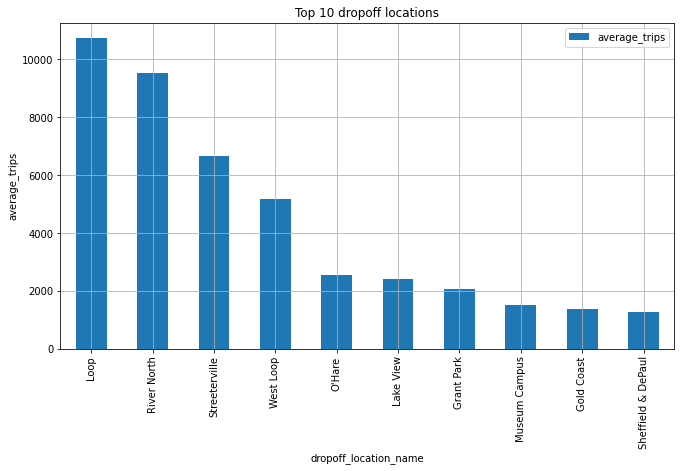

In [11]:
high_10.plot.bar(x = "dropoff_location_name", y = "average_trips", grid = "True", figsize = (11, 6))

plt.title("Top 10 dropoff locations")
plt.ylabel("average_trips")
plt.xlabel("dropoff_location_name")
plt.show()

The most popular destinations are Loop, River North, Steeterville, and West Loop. The least popular destination among the top 10 neighborhoods is Sheffield & Depaul. There is a significant difference between the top four neighborhoods and the rest. 
The fourth most popular dropoff location (West Loop) has more than twice the amount of visits as O'Hare (the 5th most popular)

### Ranking Car companies by number of trips

First we get the name of the all the Taxi companies in the dataset, and their total number

In [12]:
#Getting the name of all the taxi companies
taxi_df["company_name"].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

In [13]:
#Getting the numerical description of the column
taxi_df["trips_amount"].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Our dataset contains 64 Taxi companies. from the numerical description, the minimum number of rides is 2, while the maximum is 19558. A comapny having just two rides is quite small. Therefore, we need to filter out companies whose number of rides are not significant.  To show the number of rides for each taxi company, we would use a bar plot. The barplots in this case would be horizontal, and not vertical 

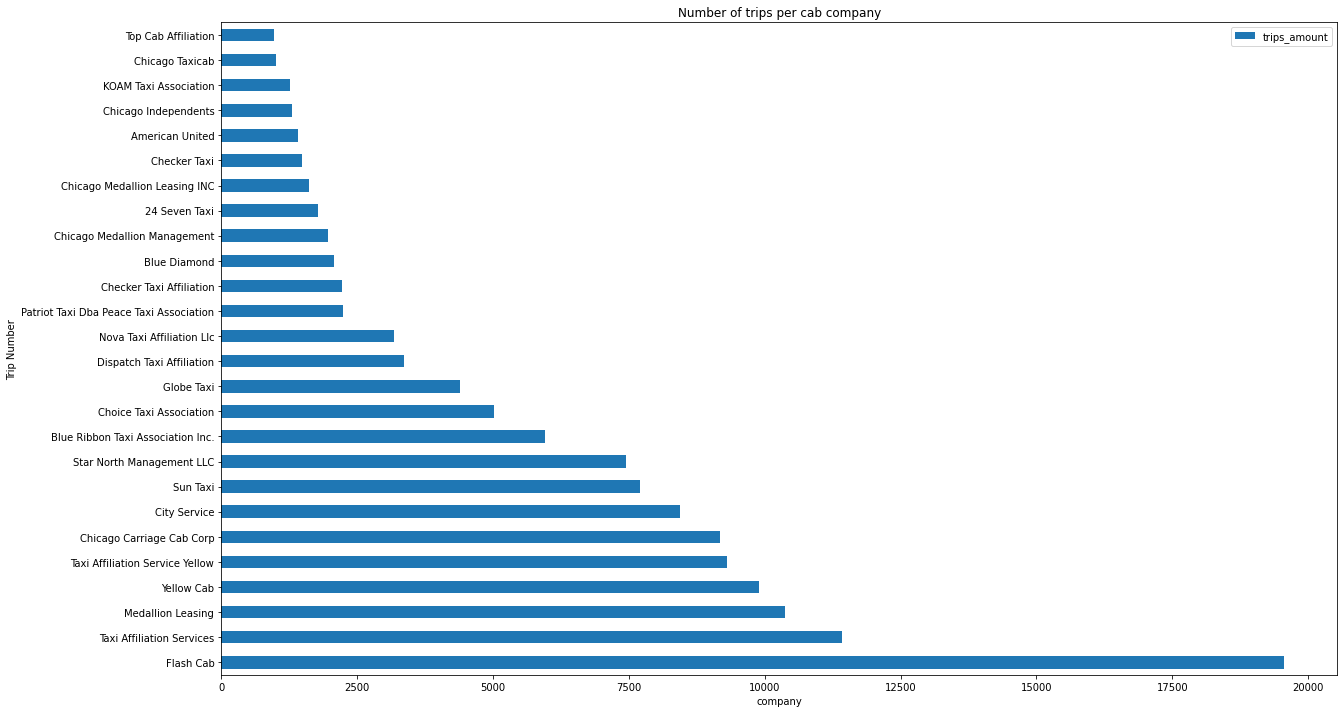

In [14]:
taxi_df.query('trips_amount >= 500').plot.barh(x='company_name', y = 'trips_amount', figsize = (20, 12))
plt.title("Number of trips per cab company")
plt.xlabel("company")
plt.ylabel("Trip Number")
plt.show()

Flash Cab has the highest number of trips, close to 20000. This is an indication that they own a lot of cabs on the road. Second is Taxi Affliation Services. After filtering out the companies whose trips are less than 500, we are left with just 26 out of 64 companies on our chart. This tells us that a smaller number of companies are controlling a larger percentage of the Market share

## Hypothesis Testing

#### Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

To Test this Hypothesis, we need out third dataset.

In [15]:
hare_data = pd.read_csv('/datasets/project_sql_result_07.csv') 

hare_data.head() #first 5 rows of our loop_ohare dataframe

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [16]:
hare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


From the information displayed on the dataset, we see that start_ts is listed as an object, which is a wrong datatype. It has to be changed to datetime.


In [22]:
#Changing the data type of the "start_ts" column
hare_data["start_ts"] = pd.to_datetime(hare_data["start_ts"], format = "%Y-%m-%d %H:%M:%S")

hare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


We slice our dataset to get the weather conditions: one where the value of the weather_conditions column is "Good", and another where the value is "Bad"

In [25]:
good_weather_data = hare_data.query('weather_conditions == "Good"')

good_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB


In [27]:
bad_weather_data = hare_data.query('weather_conditions == "Bad"')

bad_weather_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


The Null Hypothesis for this test will be that "The average duration of rides from the Loop to O'Hare International Airport does not change on rainy saturdays". Therefore, our alternate hypothesis will be "The average duration of rides from the Loop to O'Hare International Airport changes on rainy saturdays".

The statistical test that will be used to prove the hypothesis will be "ttest", and the st.ttest_ind() method will be used to test for equality of averages between the two statistical populations. The alpha value will be set at 0.05. The st.ttest_ind() returns a p-value which is compared to alpha = 0.05. If p-value is less than alpha, we reject the Null Hypothesis. If p-value is greater than alpha then we cannot reject the Null Hypothesis.

In [28]:
alpha = 0.05 #critical statistical significance

result = st.ttest_ind(good_weather_data["duration_seconds"], bad_weather_data["duration_seconds"], equal_var = False)

print("p-value:", result.pvalue)

#checking our hypothesis
if result.pvalue < alpha:
    print("we reject the null hypothesis")
else:
    print("we cannot reject the null hypothesis")

p-value: 6.738994326108734e-12
we reject the null hypothesis


The p-value is less than the alpha value. This tells us that "The average duration of rides from the Loop to O'Hare International Airport changes on rainy saturdays. Therefore, we reject our Null hypothesis.

## Conclusion

From the three datasets that we collected and analyzed, we checked the average number of rides that ended in each neighborhood, and ranked the top 10. The most popular destination was the Loop, then River North, Steeterville, and West Loop. The least popular destination among the top 10 neighborhoods is Sheffield & Depaul.

The cab companies were also ranked to know the companies that made the highest number of trips. Flash Cab had the highest number of trips, which is an indication of the amount of cabs they have on the road. Second is Taxi Affliation Services. After filtering out the companies whose trips are less than 500, we had just 26 companies left out of 64 companies from our dataset. This tells us that a smaller number of companies are controlling a larger percentage of the Market share. 

Lastly, we tested and upheld the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.